<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/3_4_Practical_Implementation_of_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Example Implementation of MLP


## 1.1 Introduction to the MNIST Dataset


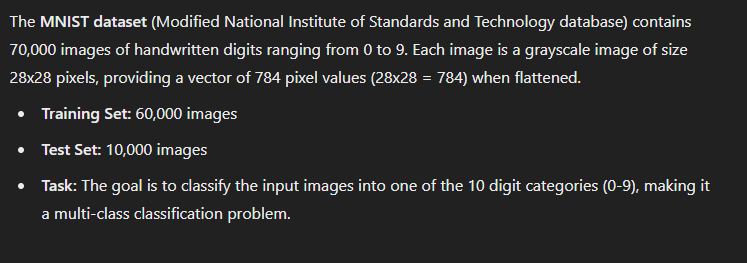

## 1.2 Designing the MLP Architecture


### 1.2.1 Input Layer


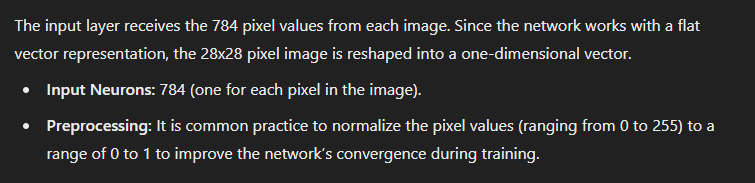

### 1.2.2 Hidden Layers


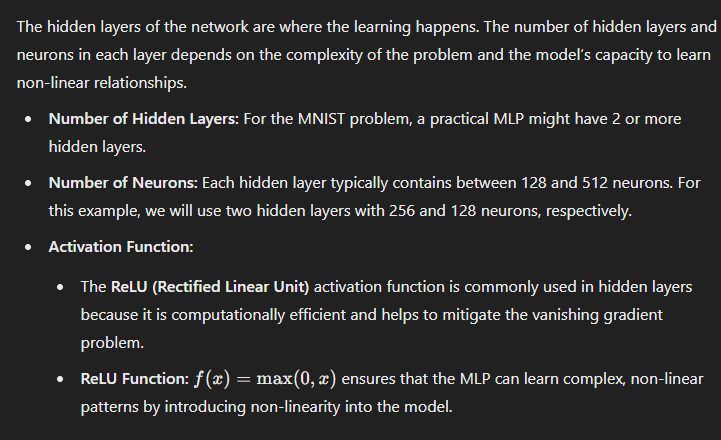

### 1.2.3 Output Layer


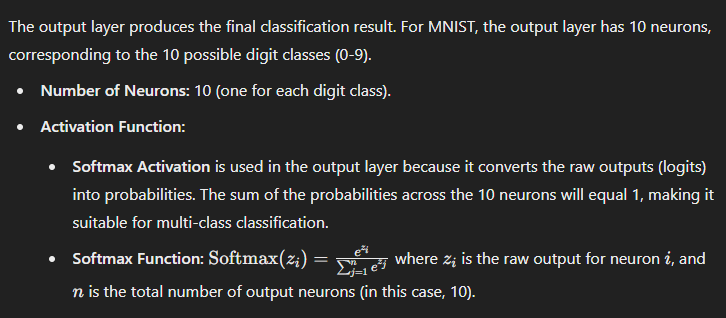

### 1.2.4 Network Summary


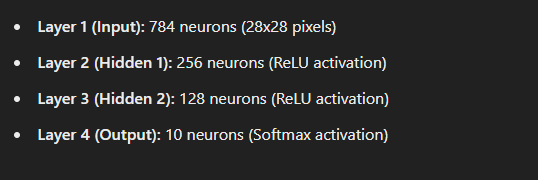

## 1.3 Training the MLP


Training an MLP involves feeding the training data into the network and adjusting the weights and biases to minimize the classification error. This is done by iteratively updating the weights through backpropagation, using an optimization algorithm.



### 1.3.1 Loss Function


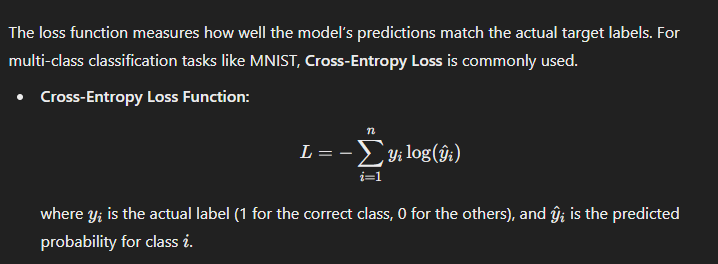

### 1.3.2 Optimization Algorithm


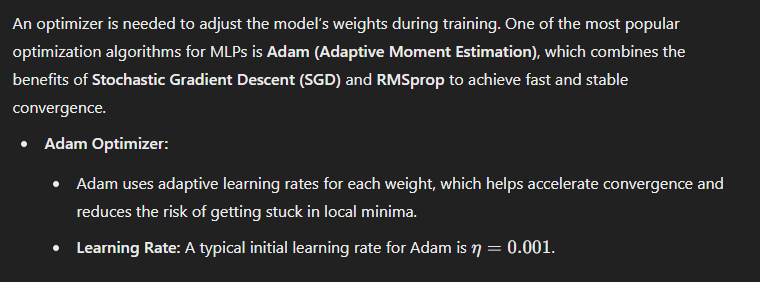

### 1.3.3 Training Process


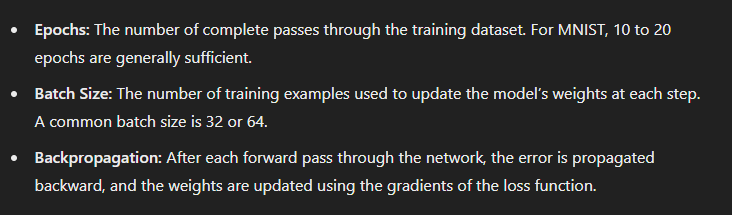

### 1.3.4 Evaluation Metrics


After training, the MLP’s performance is evaluated using accuracy as the primary metric. Accuracy is the ratio of correct predictions to the total number of test examples.



## 1.4 Implementation in Code (Python Example Using TensorFlow/Keras)


In [1]:
# Importing necessary modules from TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset, which consists of 60,000 training images and 10,000 testing images
# Each image is 28x28 pixels, and each label corresponds to the digit (0-9) shown in the image
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data:
# The pixel values range from 0 to 255. By dividing by 255, we scale the values to the range [0, 1]
# Reshape the data from (28, 28) to a flat 1D vector of size 784 (28*28), since the MLP expects a vector input.
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255

# Build the MLP model using Keras' Sequential API:
# Sequential means that the layers are stacked in order, and each layer passes its output to the next layer.
model = models.Sequential([
    # First hidden layer (Dense = fully connected layer):
    # This layer has 256 neurons and uses ReLU as the activation function.
    # ReLU introduces non-linearity, making the network capable of learning complex patterns.
    # input_shape=(784,) specifies that the input to the network is a flat vector of size 784 (28x28).
    layers.Dense(256, activation='relu', input_shape=(784,)),

    # Second hidden layer:
    # This layer has 128 neurons and also uses ReLU as the activation function.
    # The network learns more abstract features as data passes through this layer.
    layers.Dense(128, activation='relu'),

    # Output layer:
    # This layer has 10 neurons, one for each class (digits 0-9).
    # Softmax activation function converts the raw output into a probability distribution,
    # where each neuron’s output represents the probability of a digit (0-9).
    layers.Dense(10, activation='softmax')
])

# Compile the model:
# The model needs to be compiled before training. This step specifies:
# 1. Optimizer: 'adam' is an adaptive optimizer that adjusts the learning rate during training.
# 2. Loss function: 'sparse_categorical_crossentropy' is used for multi-class classification
#    where the target labels are integers (0-9).
# 3. Metrics: 'accuracy' calculates the percentage of correct predictions during training and evaluation.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model:
# The model is trained on the training data (x_train and y_train).
# The 'fit' function specifies:
# 1. epochs=10: The model will iterate over the entire dataset 10 times.
# 2. batch_size=32: The training data is split into batches of 32 samples, and the weights are updated after each batch.
# 3. validation_data: This specifies the test data (x_test and y_test) for validation during training,
#    so we can monitor how the model performs on unseen data (i.e., test data) at each epoch.
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model:
# After training, we evaluate the model’s performance on the test set (x_test, y_test) to get an unbiased estimate
# of how well the model generalizes to new data.
# The evaluate function returns the loss and accuracy on the test data.
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the test accuracy:
# This shows how well the model performs on the test set (typically in percentage form).
print('Test accuracy:', test_acc)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8923 - loss: 0.3611 - val_accuracy: 0.9658 - val_loss: 0.1126
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9726 - loss: 0.0852 - val_accuracy: 0.9754 - val_loss: 0.0809
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.9821 - loss: 0.0541 - val_accuracy: 0.9700 - val_loss: 0.0981
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9866 - loss: 0.0423 - val_accuracy: 0.9741 - val_loss: 0.0924
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9903 - loss: 0.0309 - val_accuracy: 0.9783 - val_loss: 0.0792
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9919 - loss: 0.0259 - val_accuracy: 0.9765 - val_loss: 0.0967
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9926 - loss: 0.0226 - val_accuracy: 0.9756 - val_loss: 0.0904
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9930 - loss: 0

## 1.5 Performance Evaluation


#### **1.5.1 Training Performance**
- **Training Accuracy:**
  - The training accuracy improves steadily over the 10 epochs, starting from **89.23%** in the first epoch and reaching **99.57%** by the final epoch. This indicates that the model is learning well from the training data and gradually refining its ability to classify the handwritten digits.
  
- **Training Loss:**
  - The training loss decreases significantly during the training process. It starts at **0.3611** in the first epoch and drops to a very low value of **0.0129** in the final epoch, showing that the model is effectively minimizing the error on the training data.



#### **1.5.2 Validation Performance**
- **Validation Accuracy:**
  - The validation accuracy, which measures how well the model generalizes to unseen data, starts at **96.58%** in the first epoch and reaches **97.77%** in the final epoch. This slight increase demonstrates that the model generalizes well, but the accuracy plateaus after the first few epochs, indicating diminishing returns in terms of generalization improvement.
  
- **Validation Loss:**
  - The validation loss starts at **0.1126** and decreases to **0.1031** by the final epoch. Although there is a decrease, the validation loss does not drop as dramatically as the training loss. This gap suggests that while the model performs well on the training data, it may be slightly overfitting.



#### **1.5.3 Test Performance**
- **Test Accuracy:**
  - The final test accuracy is **97.75%**, which is very close to the validation accuracy, indicating that the model generalizes well to completely unseen data. This high accuracy reflects that the MLP has successfully learned to classify the digits in the MNIST dataset.
  
- **Test Loss:**
  - The test loss is **0.1313**, slightly higher than the training and validation loss. This is expected, as the test data is completely unseen during training. However, the relatively low test loss confirms that the model has not significantly overfitted and performs well on new data.



#### **1.5.4 Conclusion**
- The model achieves excellent performance, with a **test accuracy of 97.75%** and a low **test loss of 0.1313**. The gap between the training and validation accuracy is small, suggesting the model generalizes well to unseen data, with minimal overfitting.
- The training process was efficient, with a clear improvement in accuracy and a significant reduction in loss over the 10 epochs. The model’s ability to reach almost 99.6% training accuracy and 97.7% validation/test accuracy demonstrates the effectiveness of the chosen architecture and training strategy.

# Section 2: Adding Multiple Hidden Layers


## 2.1 Understanding Hidden Layers in MLPs


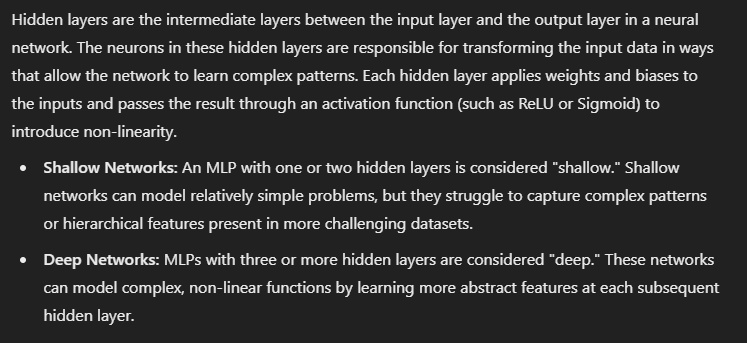

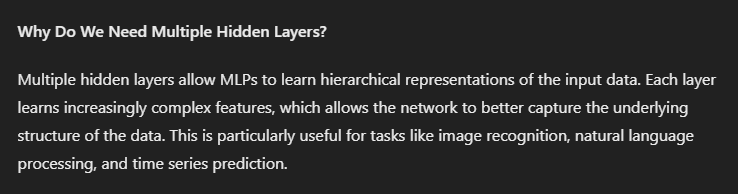

## 2.2 The Role of Additional Hidden Layers in Feature Learning


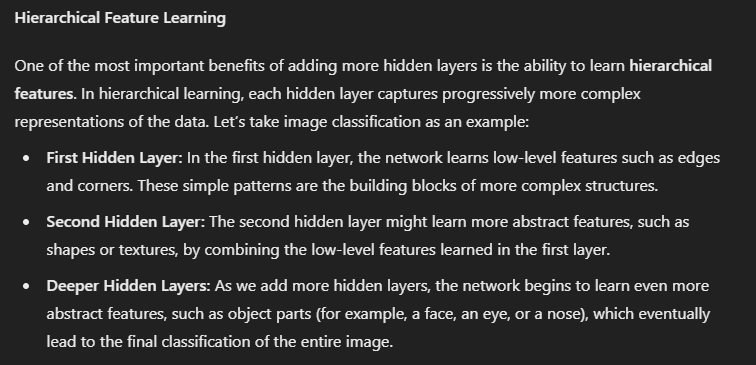

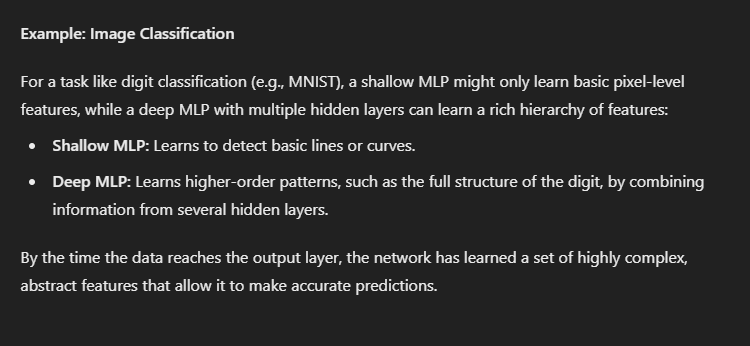

## 2.3 Impact of Multiple Hidden Layers on Model Performance


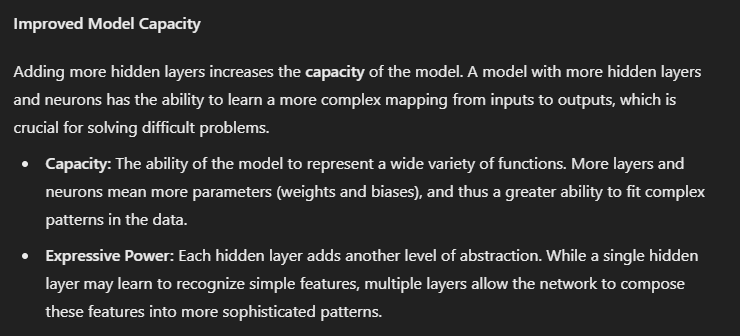

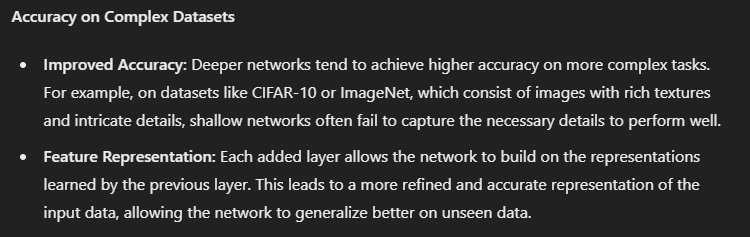

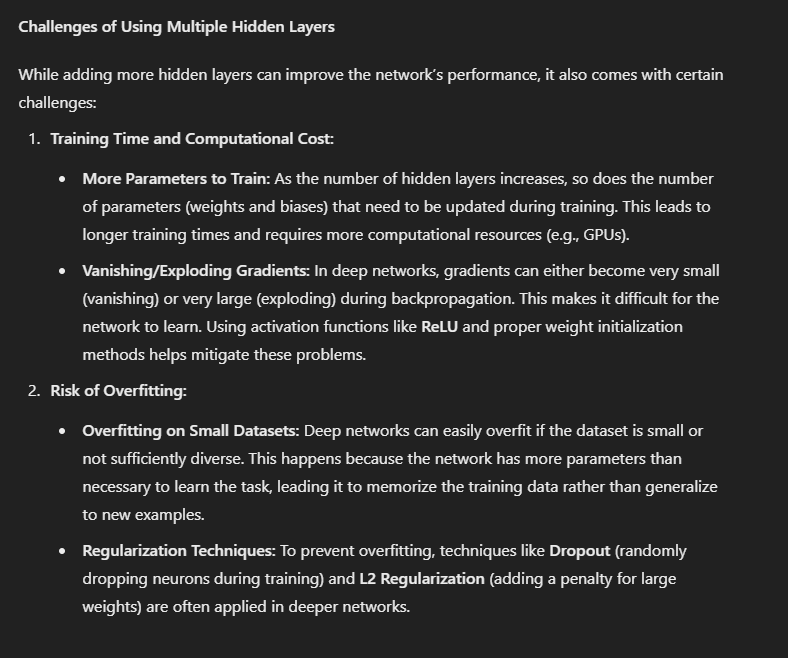

## 2.4 Comparison: Shallow vs. Deep MLPs


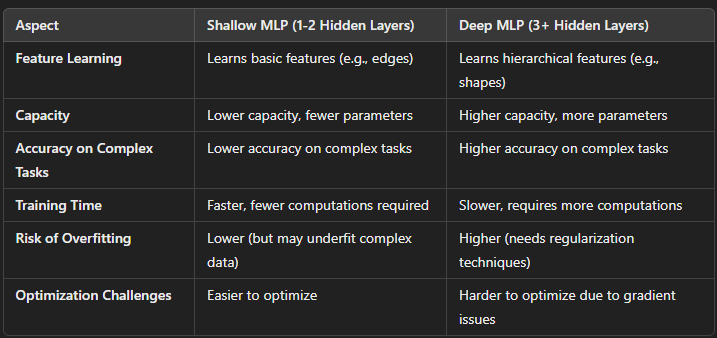

## 2.5 Regularization Techniques for Deep MLPs


When adding multiple hidden layers, the risk of overfitting increases. To prevent this, several regularization techniques can be applied during training:



### 2.5.1 Dropout


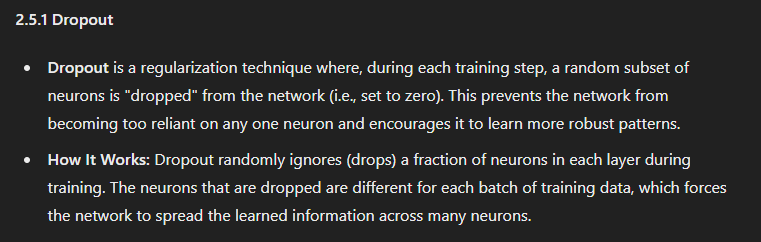

### 2.5.2 L2 Regularization


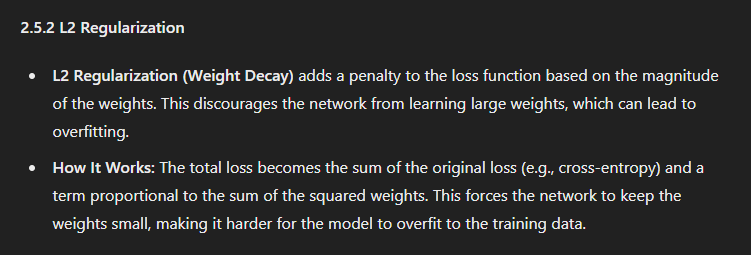

### 2.5.3 Early Stopping


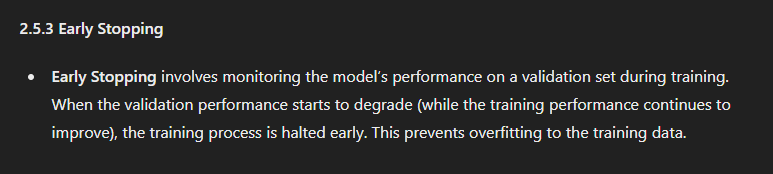

## 2.6 When to Use Deeper MLPs


While shallow networks work well for simpler tasks, deeper MLPs are often required for more complex problems where the data contains intricate patterns that cannot be captured with just one or two hidden layers.



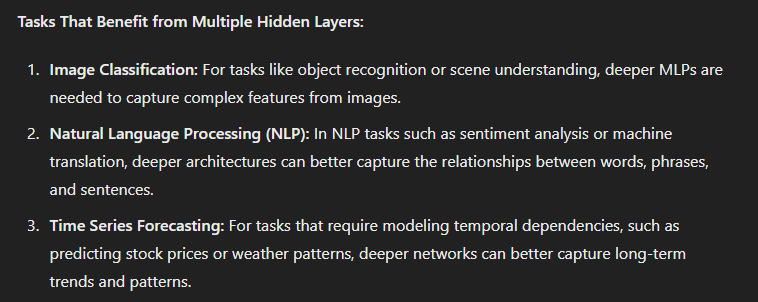

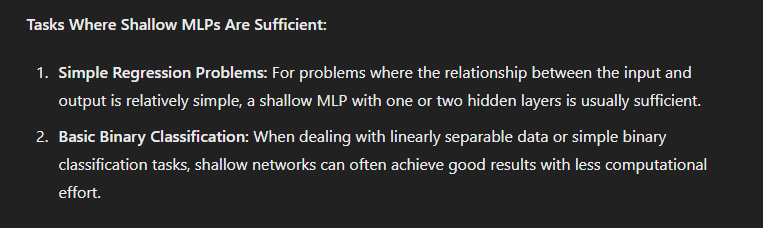

## 2.7 Practical Considerations for Deeper MLPs


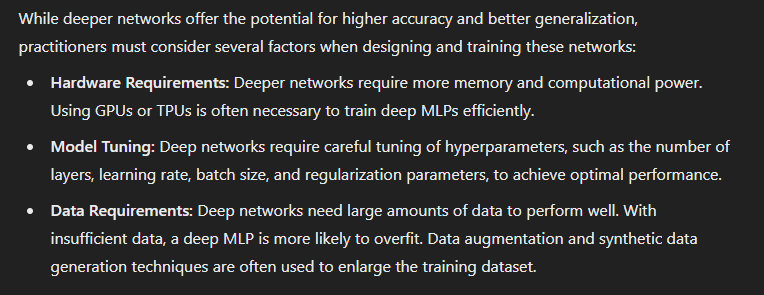

# Section 3: Real-world Applications of MLPs in Complex Tasks


## 3.1 MLPs in Image Classification


Image classification is one of the most common tasks in machine learning, where the goal is to assign a label to an image based on its contents. For example, in the MNIST dataset, the task is to classify handwritten digits. In more complex datasets like CIFAR-10 or ImageNet, the goal might be to classify objects, animals, or scenes.



### 3.1.1 Key Challenges in Image Classification



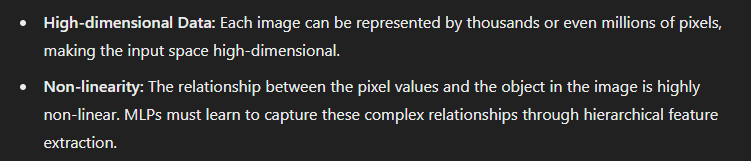

### 3.1.2 How MLPs Solve Image Classification Problems


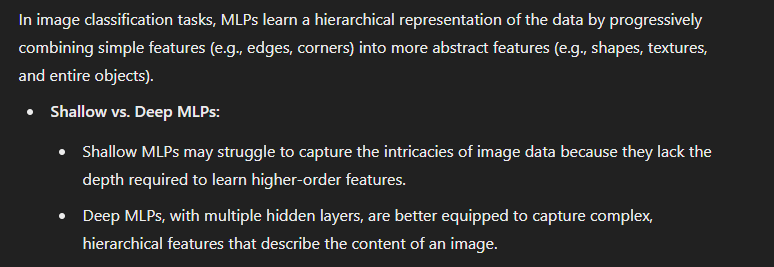

### 3.1.3 Real-world Example: ImageNet


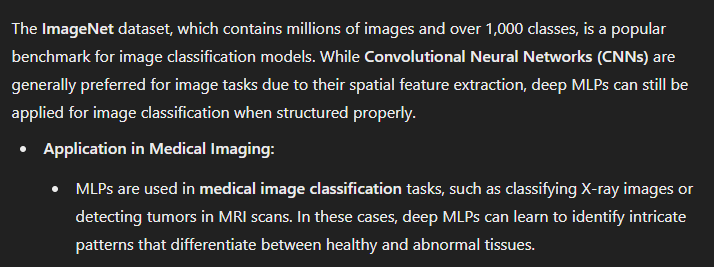

### 3.1.4 Limitations and Alternatives


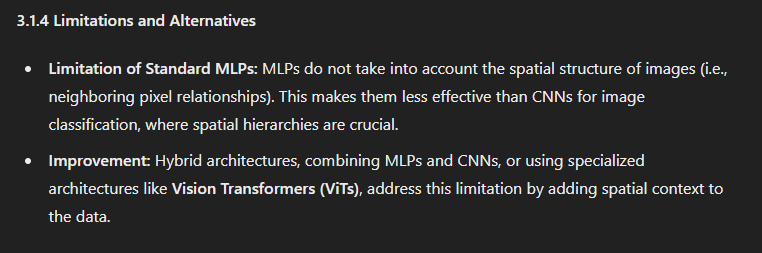

## 3.2 MLPs in Natural Language Processing (NLP)


Natural Language Processing (NLP) is the field of AI that focuses on enabling computers to understand, interpret, and generate human language. NLP tasks include sentiment analysis, language translation, text classification, and speech recognition.



### 3.2.1 Key Challenges in NLP


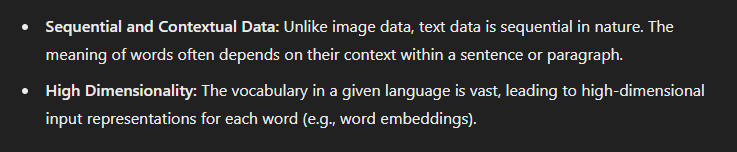

### 3.2.2 How MLPs Address NLP Tasks


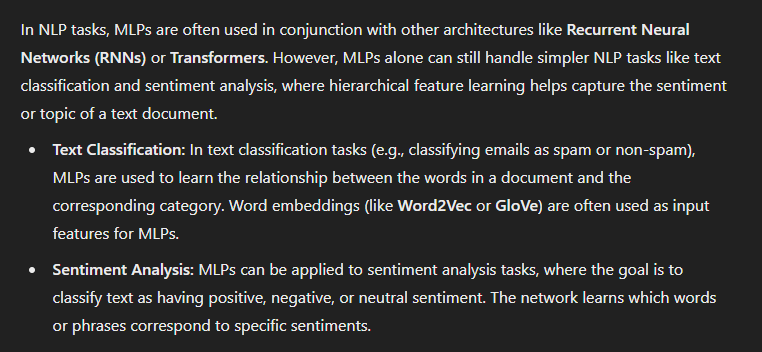

### 3.2.3 Real-world Example: Spam Detection


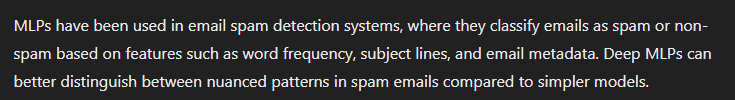

### 3.2.4 Limitations and Improvements


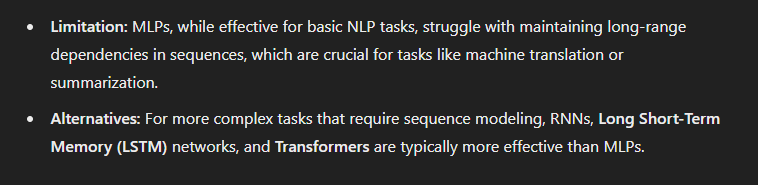

## 3.3 MLPs in Time Series Prediction


Time series forecasting involves predicting future values in a sequence based on past observations. Examples of time series data include stock prices, weather conditions, and energy consumption patterns.



### 3.3.1 Key Challenges in Time Series Forecasting


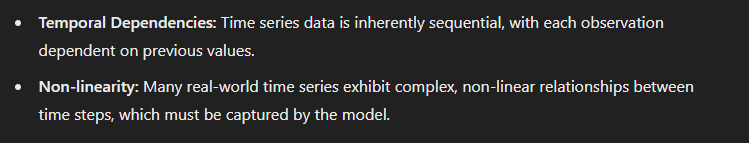

### 3.3.2 How MLPs Are Used in Time Series Forecasting


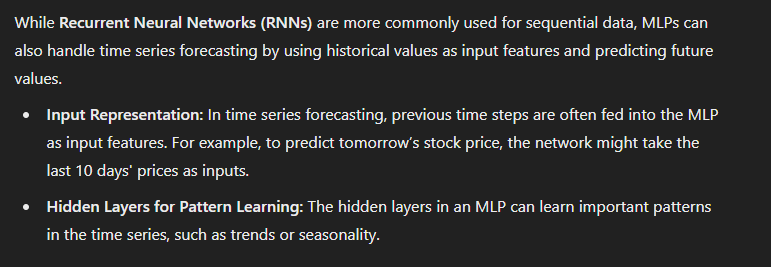

### 3.3.3 Real-world Example: Stock Price Prediction


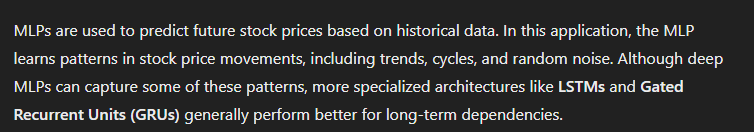

### 3.3.4 Limitations and Alternatives


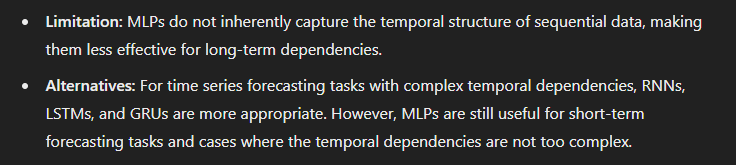

## 3.4 MLPs in Financial Modeling


MLPs are widely used in the financial sector for tasks such as credit scoring, fraud detection, and risk assessment.



### 3.4.1 Key Challenges in Financial Data


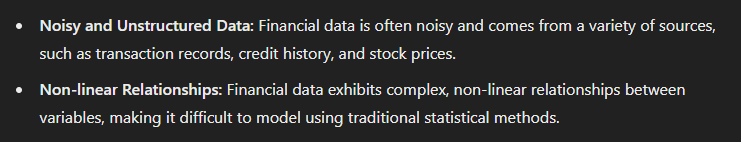

### 3.4.2 How MLPs Are Used in Financial Modeling


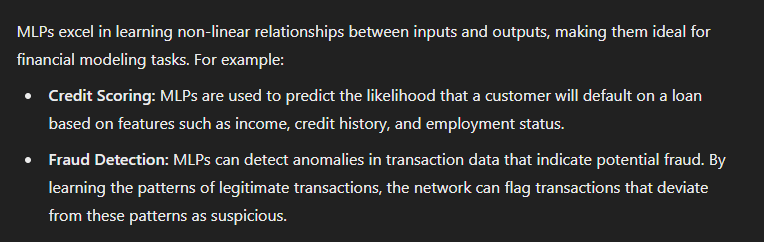

### 3.4.3 Real-world Example: Fraud Detection in Credit Card Transactions


Financial institutions use MLPs to detect fraudulent transactions by analyzing patterns in transaction data. The network learns to distinguish between normal and abnormal transactions based on features such as transaction amount, location, and frequency.



### 3.4.4 Limitations and Alternatives


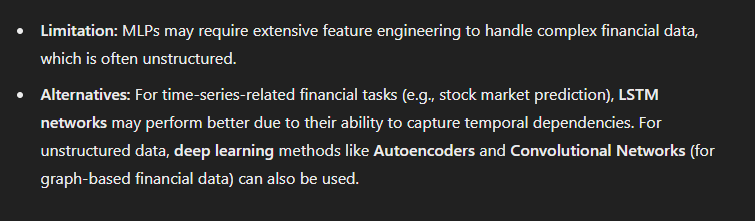

## 3.5 MLPs in Healthcare and Medicine


The healthcare domain has seen a growing use of MLPs for tasks such as medical diagnosis, drug discovery, and personalized medicine. MLPs are applied to structured medical datasets to predict outcomes based on patient data.



### 3.5.1 Key Challenges in Healthcare Applications


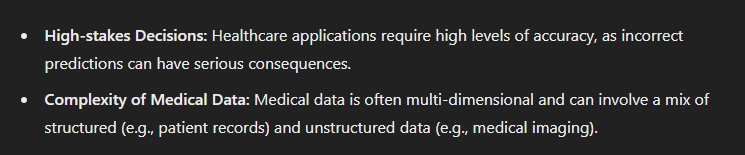

### 3.5.2 How MLPs Are Used in Healthcare


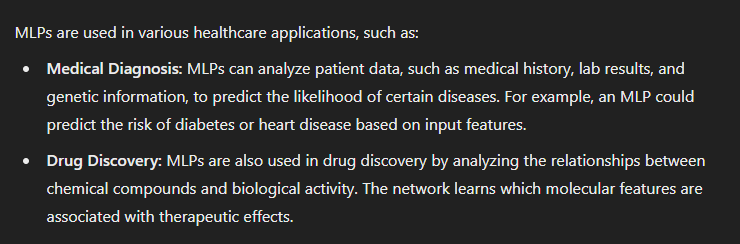

### 3.5.3 Real-world Example: Predicting Disease Risk


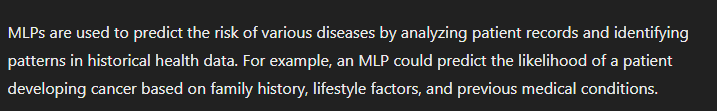

### 3.5.4 Limitations and Alternatives


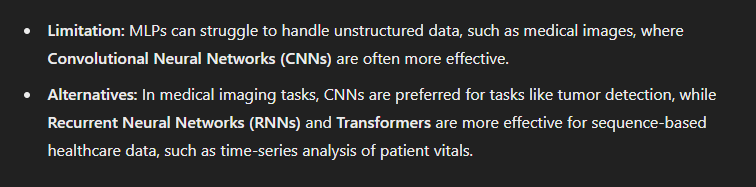